### 1. Load data 

In [1]:
import tensorflow_datasets as tfds

imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_set, test_set = imdb['train'], imdb['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteBFCWGI/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteBFCWGI/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteBFCWGI/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [2]:
import numpy as np

train_sentences = []
train_labels = []
test_sentences = []
test_labels = []

for line, label in train_set:
    train_sentences.append(str(line.numpy()))
    train_labels.append(label.numpy())

for line, label in test_set:
    test_sentences.append(str(line.numpy()))
    test_labels.append(label.numpy())

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

print('size of train set: ', len(train_sentences))
print('size of test set: ', len(test_sentences))

size of train set:  25000
size of test set:  25000


In [3]:
print(train_sentences[0])

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."


2. Prepare data

Tokenize and encode sentence to numerical sequence, and pad sequences to a fixed length.

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# hyperparameters
max_length = 120
vocab_size = 10000
oov_tok = '<OOV>'
embedding_dim = 16
trunc_type = 'post'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

### 3. Model declaration

**Deep Neural Network**

In [ ]:
'''
import tensorflow as tf 

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    #tf.keras.layers.Flatten(),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
'''

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


**CNN**

In [ ]:
'''
import tensorflow as tf 

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
'''

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


**LSTM**

In [6]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 64)           12544     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 197,773
Trainable params: 197,773
Non-trainable params: 0
_________________________________________________________________


### 4. Training and evaluation

In [7]:
num_epochs = 10

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_padded, 
                    train_labels, 
                    validation_data=(test_padded, test_labels), 
                    epochs=num_epochs)

Epoch 1/10
782/782 [==============================] - 60s 31ms/step - loss: 0.5500 - accuracy: 0.6832 - val_loss: 0.3890 - val_accuracy: 0.8258
Epoch 2/10
782/782 [==============================] - 23s 29ms/step - loss: 0.2809 - accuracy: 0.8894 - val_loss: 0.4019 - val_accuracy: 0.8181
Epoch 3/10
782/782 [==============================] - 23s 29ms/step - loss: 0.2106 - accuracy: 0.9224 - val_loss: 0.4444 - val_accuracy: 0.8158
Epoch 4/10
782/782 [==============================] - 23s 29ms/step - loss: 0.1457 - accuracy: 0.9490 - val_loss: 0.5330 - val_accuracy: 0.8076
Epoch 5/10
782/782 [==============================] - 23s 29ms/step - loss: 0.1031 - accuracy: 0.9658 - val_loss: 0.5897 - val_accuracy: 0.7934
Epoch 6/10
782/782 [==============================] - 23s 29ms/step - loss: 0.0744 - accuracy: 0.9750 - val_loss: 0.7205 - val_accuracy: 0.7992
Epoch 7/10
782/782 [==============================] - 23s 29ms/step - loss: 0.0506 - accuracy: 0.9833 - val_loss: 0.7135 - val_accuracy:

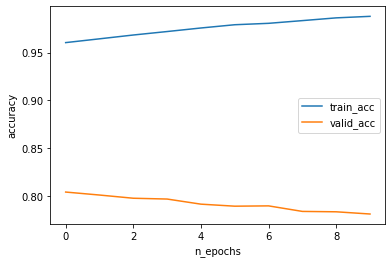

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train_acc = history.history[    'accuracy']
valid_acc = history.history['val_accuracy']

plt.legend()
plt.ylim([0, 1])
plt.grid(True)
plt.xlabel('n_epochs')
plt.ylabel('accuracy')

plt.plot(train_acc, label='train_acc')
plt.plot(valid_acc, label='valid_acc')
plt.show()

In [ ]:
import io

out_meta = io.open('meta.tsv', 'w', encoding='utf-8')
out_vecs = io.open('vecs.tsv', 'w', encoding='utf-8')
embed_matrix = model.layers[0].get_weights()[0]

for i in range(1, vocab_size):
    word = tokenizer.index_word.get(i)
    weights = embed_matrix[i]

    out_meta.write(word + '\n')
    out_vecs.write('\t'.join([str(x) for x in weights]) + '\n')

out_meta.close()
out_vecs.close()

In [ ]:
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('meta.tsv')
    files.download('vecs.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>